In [ ]:
# TODO: grid/random search with cross validation (with keras & sklearn)
# 1. see keras_test.py for cross validation
# 2. https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def get_data(path, shuffle=True):
    # images are 48x48 = 2304 size vectors
    X = []
    Y = []
    first = True
    for line in open(path):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])
    X, Y = np.array(X) / 255.0, np.array(Y)
    if shuffle:
        idx = list(range(len(Y)))
        np.random.shuffle(idx)
        X = X[idx]
        Y = Y[idx]
    return X, Y


def show_im(X, Y):
    cls = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'Neutral']
    while True:
        for i in range(7):
            x = X[Y == i, :]
            j = np.random.choice(len(x))
            n_pixel = int(np.sqrt(x.shape[1]))
            plt.imshow(x[j].reshape(n_pixel, n_pixel))
            plt.title(cls[i])
            plt.show()
        if input('Quit? (Y/n):') == 'Y':
            break

In [3]:
X, Y = get_data('data/fer2013.csv', shuffle=True)

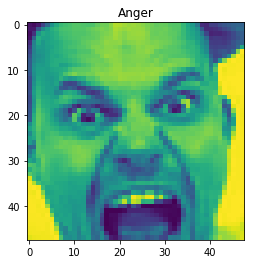

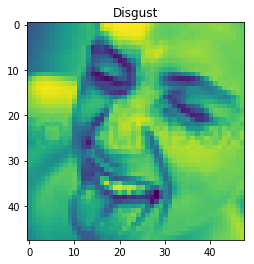

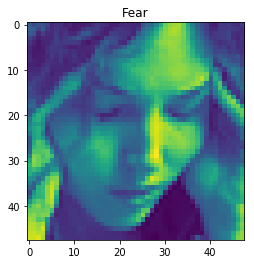

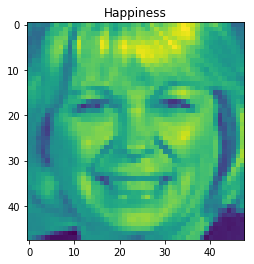

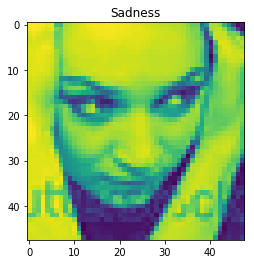

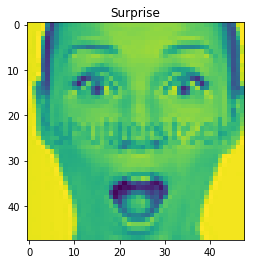

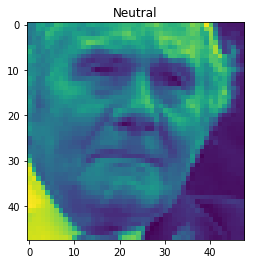

Quit? (Y/n):n


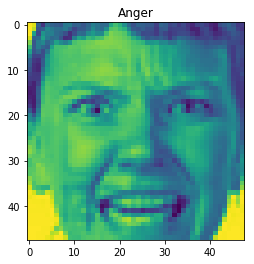

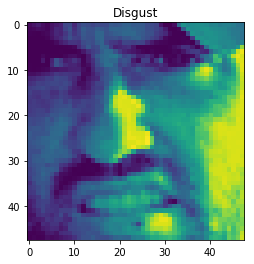

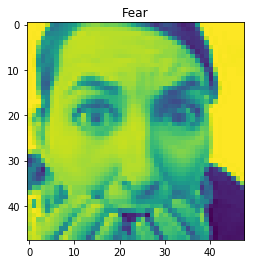

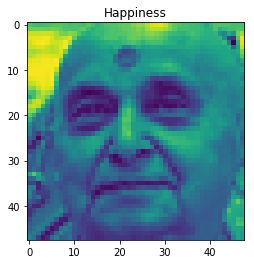

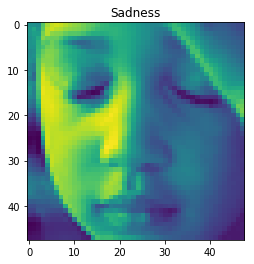

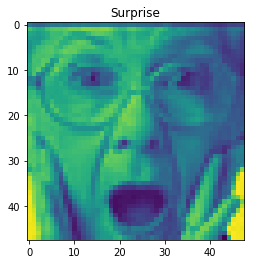

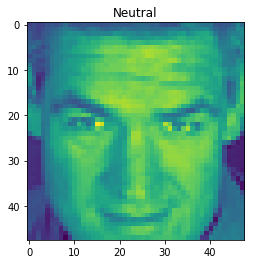

Quit? (Y/n):Y


In [4]:
show_im(X, Y)

In [5]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(len(set(Y)), activation=tf.keras.activations.softmax)])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=[tf.keras.metrics.categorical_accuracy])
result = model.fit(X, Y, validation_split=0.05, batch_size=100, epochs=100)

Instructions for updating:
Colocations handled automatically by placer.
Train on 34092 samples, validate on 1795 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
34092/34092 [==============================] - 2s 49us/sample - loss: 47.7030 - categorical_accuracy: 0.5050 - val_loss: 44.9240 - val_categorical_accuracy: 0.0000e+00
Epoch 2/100
34092/34092 [==============================] - 1s 40us/sample - loss: 45.2855 - categorical_accuracy: 0.0410 - val_loss: 44.9240 - val_categorical_accuracy: 0.0000e+00
Epoch 3/100
34092/34092 [==============================] - 1s 40us/sample - loss: 45.2855 - categorical_accuracy: 0.0205 - val_loss: 44.9240 - val_categorical_accuracy: 0.0000e+00
Epoch 4/100
34092/34092 [==============================] - 1s 40us/sample - loss: 45.2855 - categorical_accuracy: 0.0791 - val_loss: 44.9240 - val_categorical_accuracy: 0.0000e+00
Epoch 5/100
34092/34092 [==============================] - 1s 40us/sample - loss: 45.2855 - categorical_accurac

34092/34092 [==============================] - 1s 42us/sample - loss: 45.2855 - categorical_accuracy: 0.1232 - val_loss: 44.9240 - val_categorical_accuracy: 0.0000e+00
Epoch 44/100
34092/34092 [==============================] - 1s 41us/sample - loss: 45.2855 - categorical_accuracy: 0.1552 - val_loss: 44.9240 - val_categorical_accuracy: 0.0000e+00
Epoch 45/100
34092/34092 [==============================] - 1s 40us/sample - loss: 45.2855 - categorical_accuracy: 0.1731 - val_loss: 44.9240 - val_categorical_accuracy: 0.0000e+00
Epoch 46/100
34092/34092 [==============================] - 1s 40us/sample - loss: 45.2855 - categorical_accuracy: 0.0821 - val_loss: 44.9240 - val_categorical_accuracy: 0.0000e+00
Epoch 47/100
34092/34092 [==============================] - 1s 40us/sample - loss: 45.2855 - categorical_accuracy: 0.0586 - val_loss: 44.9240 - val_categorical_accuracy: 0.0000e+00
Epoch 48/100
34092/34092 [==============================] - 1s 41us/sample - loss: 45.2855 - categorical_acc

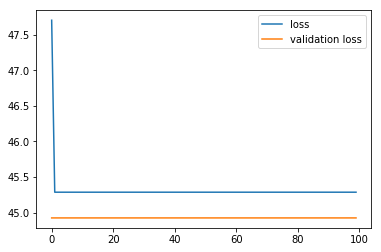

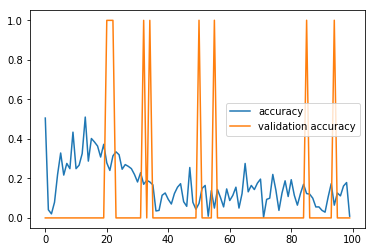

In [6]:
    plt.plot(result.history['loss'], label='loss')
    plt.plot(result.history['val_loss'], label='validation loss')
    plt.legend()
    plt.show()
    plt.plot(result.history['categorical_accuracy'], label='accuracy')
    plt.plot(result.history['val_categorical_accuracy'], label='validation accuracy')
    plt.legend()
    plt.show()

In [8]:
model.predict(X[1000:1001])

array([[0.14285973, 0.14287429, 0.14280975, 0.14281008, 0.14284515,
        0.14283693, 0.14296402]], dtype=float32)

In [9]:
model.evaluate(X, Y)

35887/35887 [==============================] - 1s 31us/sample - loss: 45.2674 - categorical_accuracy: 0.0000e+00


[45.267421382791696, 0.0]

In [10]:
model2 = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(len(set(Y)), activation=tf.keras.activations.softmax)])
model2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=[tf.keras.metrics.categorical_accuracy])

In [11]:
result2 = model2.fit(X, Y, batch_size=100, epochs=50)

Epoch 1/50
35887/35887 [==============================] - 2s 45us/sample - loss: 45.3308 - categorical_accuracy: 0.7297
Epoch 2/50
35887/35887 [==============================] - 1s 39us/sample - loss: 45.2674 - categorical_accuracy: 0.8847
Epoch 3/50
35887/35887 [==============================] - 1s 39us/sample - loss: 45.2674 - categorical_accuracy: 0.4606
Epoch 4/50
35887/35887 [==============================] - 1s 39us/sample - loss: 45.2674 - categorical_accuracy: 0.4391
Epoch 5/50
35887/35887 [==============================] - 1s 39us/sample - loss: 45.2674 - categorical_accuracy: 0.3030
Epoch 6/50
35887/35887 [==============================] - 1s 39us/sample - loss: 45.2674 - categorical_accuracy: 0.2561
Epoch 7/50
35887/35887 [==============================] - 1s 39us/sample - loss: 45.2674 - categorical_accuracy: 0.2171
Epoch 8/50
35887/35887 [==============================] - 1s 39us/sample - loss: 45.2674 - categorical_accuracy: 0.2419
Epoch 9/50
35887/35887 [================

In [13]:
model2.predict_proba(X)

array([[0.14286613, 0.14287591, 0.1428765 , ..., 0.14284575, 0.14281726,
        0.14284204],
       [0.14286613, 0.14287591, 0.1428765 , ..., 0.14284575, 0.14281726,
        0.14284204],
       [0.14286613, 0.14287591, 0.1428765 , ..., 0.14284575, 0.14281726,
        0.14284204],
       ...,
       [0.14286613, 0.14287591, 0.1428765 , ..., 0.14284575, 0.14281726,
        0.14284204],
       [0.14286613, 0.14287591, 0.1428765 , ..., 0.14284575, 0.14281726,
        0.14284204],
       [0.14286613, 0.14287591, 0.1428765 , ..., 0.14284575, 0.14281726,
        0.14284204]], dtype=float32)

In [16]:
model2.predict_classes(X)

array([2, 2, 2, ..., 2, 2, 2])